In [1]:
from PIL import Image
import numpy as np
import torch
from basic_unet import UNet
from dataset import BratsDataset
from plot_utils import plot_image_row
from torchvision import transforms
from pathlib import Path
import hdm

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = UNet(in_channels=4, out_channels=1)
state_dict = torch.load('models/3_basic_unet_flat_criterion_279_0.00000.pth')
model.load_state_dict(state_dict)
model = model.to(device)

In [3]:
transform = transforms.Compose([
    transforms.Normalize([0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5])
])
dataset = BratsDataset(Path('data/processed/'), transform)

In [4]:
sample = dataset.get_sample('Brats18_2013_17_1', 'L1')
segment = sample['segment']
image = sample['input']

In [5]:
explainer = hdm.HausdorffDistanceMasks(240, 240)
explainer.generate_masks(circle_size=15, offset=5, normalize=True)
result = explainer.explain(model, image, segment, device)

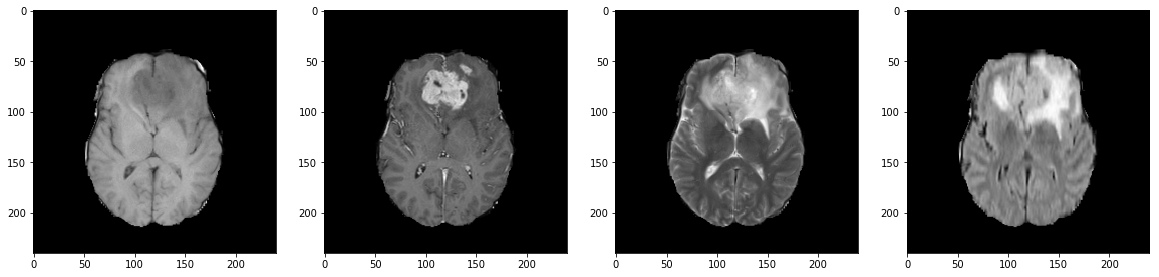

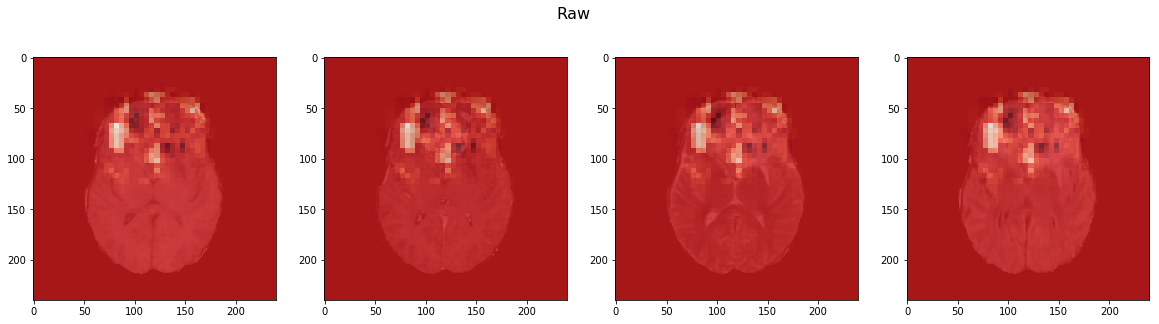

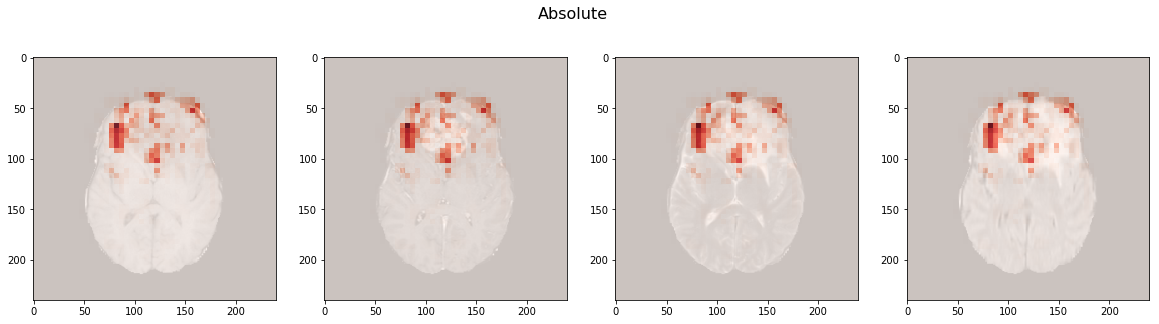

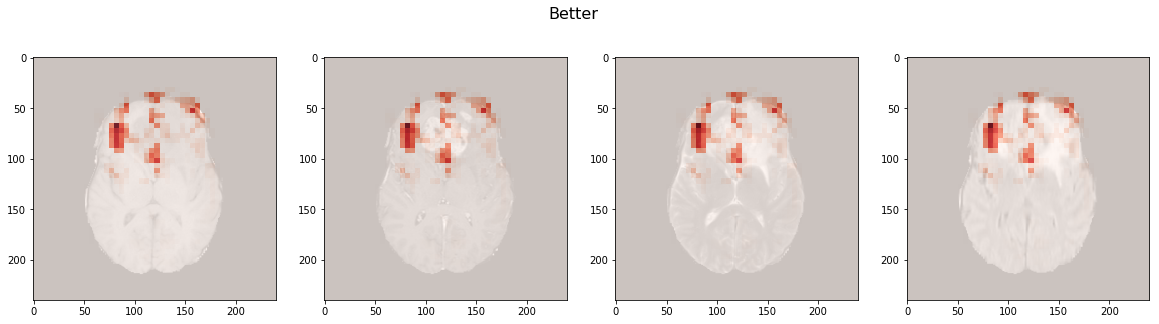

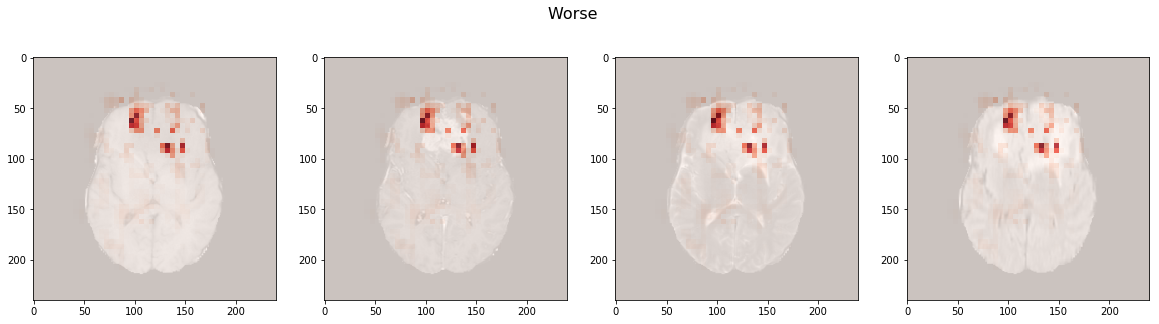

In [6]:
raw = result.distances(hdm.RAW)
absolute = result.distances(hdm.ABSOLUTE)
better = result.distances(hdm.BETTER_ONLY)
worse = result.distances(hdm.WORSE_ONLY)

raw = np.array(Image.fromarray(raw).resize((240, 240)))
absolute = np.array(Image.fromarray(absolute).resize((240, 240)))
better = np.array(Image.fromarray(better).resize((240, 240)))
worse = np.array(Image.fromarray(worse).resize((240, 240)))

plot_image_row(
    image,
    color_map='gray',
)
plot_image_row(
    image,
    title='Raw',
    color_map='gray',
    overlay=raw,
)
plot_image_row(
    image,
    title='Absolute',
    color_map='gray',
    overlay=absolute,
)
plot_image_row(
    image,
    title='Better',
    color_map='gray',
    overlay=better,
)
plot_image_row(
    image,
    title='Worse',
    color_map='gray',
    overlay=worse,
)

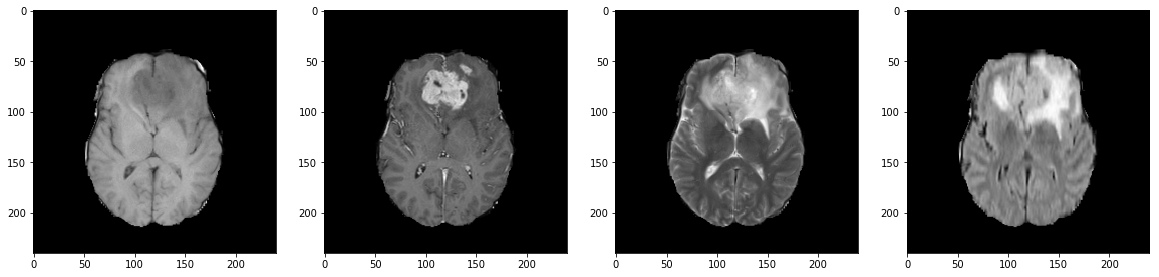

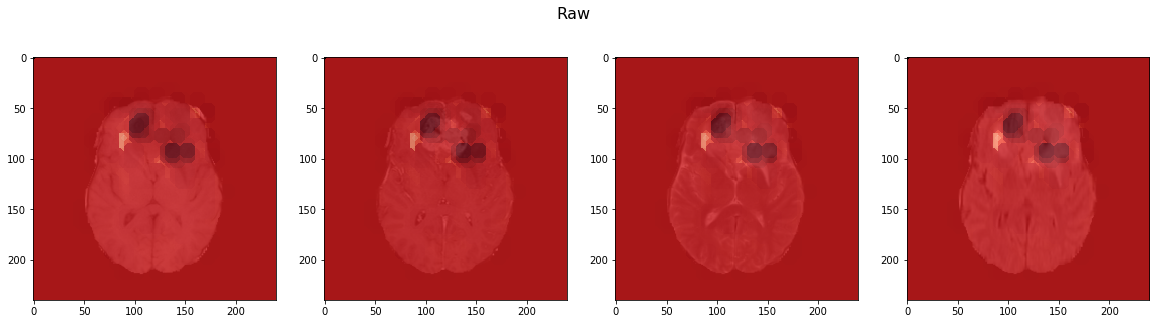

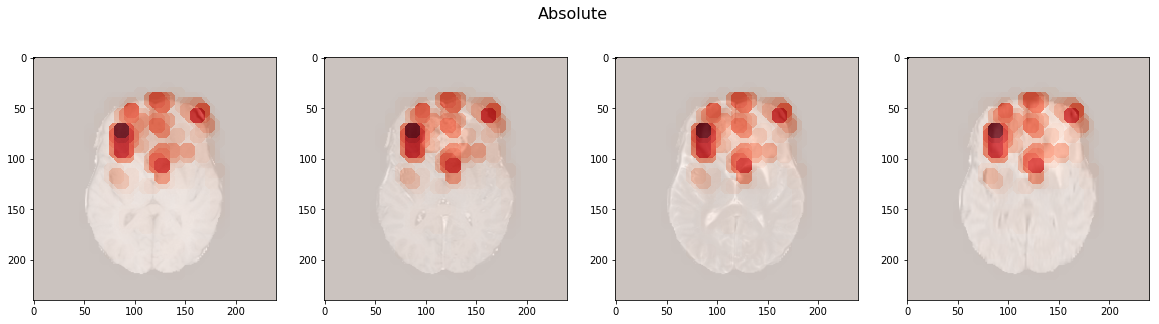

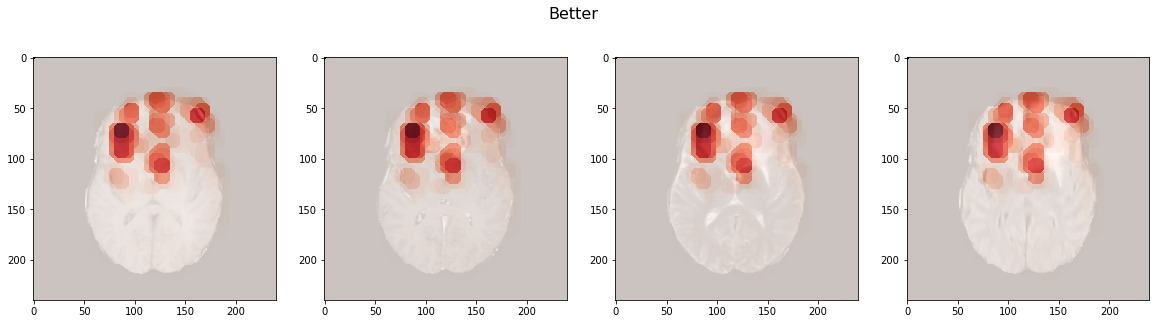

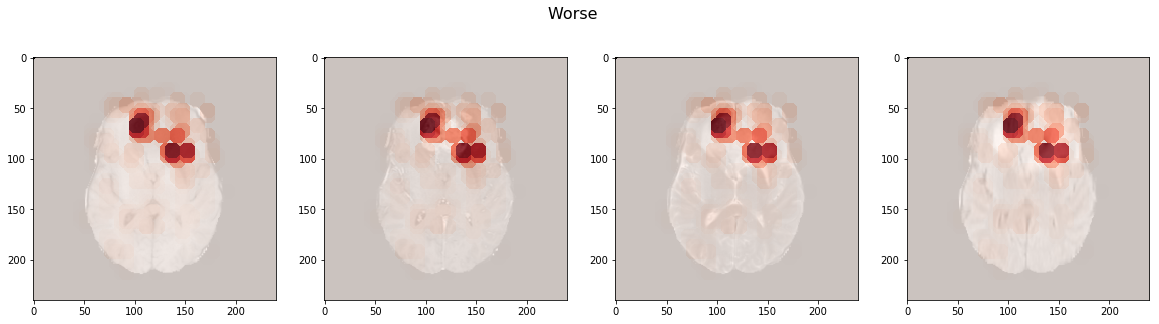

In [7]:
raw = result.circle_map(hdm.RAW)
absolute = result.circle_map(hdm.ABSOLUTE)
better = result.circle_map(hdm.BETTER_ONLY)
worse = result.circle_map(hdm.WORSE_ONLY)

plot_image_row(
    image,
    color_map='gray',
)
plot_image_row(
    image,
    title='Raw',
    color_map='gray',
    overlay=raw,
)
plot_image_row(
    image,
    title='Absolute',
    color_map='gray',
    overlay=absolute,
)
plot_image_row(
    image,
    title='Better',
    color_map='gray',
    overlay=better,
)
plot_image_row(
    image,
    title='Worse',
    color_map='gray',
    overlay=worse,
)